In [1]:
import matplotlib.pyplot as plt
from gwpy.segments import DataQualityFlag
from gwpy.timeseries import TimeSeries
import numpy as np

O3 is from 1st April 2019 to 1st October 2019. For CBC the data that passes the data quality from H1 and L1 is plotted below in the first panel. CW flags missing #TODO

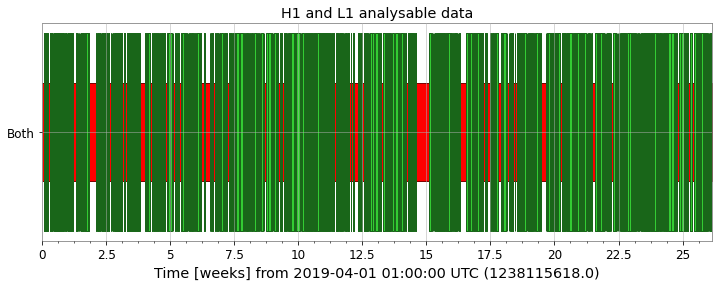

In [2]:
def data_quality(flags, start, end):
    
    for f in range(len(flags)):
        if f == 0:
            data_flag = DataQualityFlag.fetch_open_data(flags[f], start, end)
        else:
            new_flag = DataQualityFlag.fetch_open_data(flags[f], start, end)
            data_flag = data_flag & new_flag

    return data_flag

flags = ['H1_CBC_CAT3',
         'L1_CBC_CAT3', 'H1_NO_CBC_HW_INJ', 
         'H1_NO_DETCHAR_HW_INJ', 'H1_NO_STOCH_HW_INJ',  'L1_NO_CBC_HW_INJ', 
         'L1_NO_DETCHAR_HW_INJ', 'L1_NO_STOCH_HW_INJ']

start ='Apr 1 2019'; end = 'Oct 1 2019'
both = data_quality(flags, start, end)
plot = both.plot(label='Both')
ax = plot.gca()
plt.title('H1 and L1 analysable data')
plot.show()